In [44]:
!pip install keras-rl

In [0]:
import os
import numpy as np
import gym

from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.models import Sequential

from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy, GreedyQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory

In [46]:
ENV_NAME = 'MountainCar-v0'
env = gym.make(ENV_NAME)

obs_space_shape = env.observation_space.shape
nb_actions = env.action_space.n

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [47]:
model = Sequential()
model.add( Flatten(input_shape=(1, )+obs_space_shape) )
model.add( Dense(20) )
model.add( Activation('relu') )
model.add( Dense(20) )
model.add( Activation('relu') )
model.add( Dense(20) )
model.add( Activation('relu') )
model.add( Dense(nb_actions) )

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                60        
_________________________________________________________________
activation_13 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_14 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_15 (Activation)   (None, 20)                0         
__________

In [0]:
policy = GreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)

In [0]:
dqn = DQNAgent(model=model, memory=memory, policy=policy, nb_actions=nb_actions,
               nb_steps_warmup=10, target_model_update=1e-2)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [50]:
history = dqn.fit(env, nb_steps=100000, visualize=False, verbose=2)

Training for 100000 steps ...


/usr/local/lib/python3.6/dist-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   200/100000: episode: 1, duration: 1.917s, episode steps: 200, steps per second: 104, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.565 [0.000, 2.000], mean observation: -0.296 [-1.200, 0.106], loss: 0.184539, mean_absolute_error: 0.650202, mean_q: -0.665794
   400/100000: episode: 2, duration: 0.635s, episode steps: 200, steps per second: 315, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.705 [0.000, 2.000], mean observation: -0.284 [-0.812, 0.013], loss: 0.003750, mean_absolute_error: 1.488690, mean_q: -2.184689
   600/100000: episode: 3, duration: 0.639s, episode steps: 200, steps per second: 313, episode reward: -200.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.325 [0.000, 2.000], mean observation: -0.313 [-0.817, 0.012], loss: 0.015285, mean_absolute_error: 2.499768, mean_q: -3.690566
   800/100000: episode: 4, duration: 0.644s, episode steps: 200, steps per second: 311, episode reward: -200.000, mean

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
models_dir = '/content/drive/My Drive/open_ai/models'
filename = 'mountaincar_greedy_policy.h5'

dqn.save_weights( os.path.join(models_dir, filename), overwrite=True )

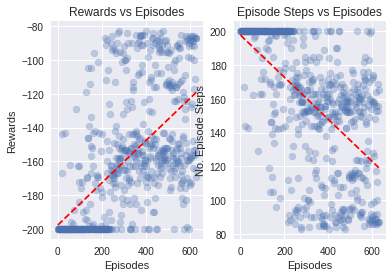

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

nb_episodes = len(history.history['episode_reward'])

z_episode_reward = np.polyfit( range(nb_episodes), history.history['episode_reward'], 1 )
p_episode_reward = np.poly1d(z_episode_reward)

ax1 = fig.add_subplot(121)
ax1.scatter( range(nb_episodes), history.history['episode_reward'], alpha=0.3 )
ax1.plot( range(nb_episodes), p_episode_reward( range(nb_episodes) ), 'r--' )
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Rewards')
ax1.set_title('Rewards vs Episodes')

z_episode_steps = np.polyfit( range(nb_episodes), history.history['nb_episode_steps'], 1 )
p_episode_steps = np.poly1d(z_episode_steps)

ax2 = fig.add_subplot(122)
ax2.scatter( range(len(history.history['nb_episode_steps'])), history.history['nb_episode_steps'], alpha=0.3 )
ax2.plot( range(nb_episodes), p_episode_steps(range(nb_episodes)), 'r--' )
ax2.set_xlabel('Episodes')
ax2.set_ylabel('No. Episode Steps')
ax2.set_title('Episode Steps vs Episodes')

results_dir = '/content/drive/My Drive/open_ai/results'
filename = 'MountainCar-greedy.png'
fig.savefig( os.path.join(results_dir, filename) )
fig.show()